In [1]:
import cv2
from matplotlib import pyplot as plt
import lane_detection
import numpy as np

In [ ]:
IP_ADDRESS = "192.168.1.102"

In [ ]:
vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")

img = None

MAX_RETRY = 100
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()

    # Check frame was received successfully
    if ret:
        # got a frame, close the cap and return the frame
        print(" got a frame ")
        img = frame
        cv2.imwrite('frame.jpg', frame)
        vcap.release()

vcap.release()

In [ ]:
type(img)

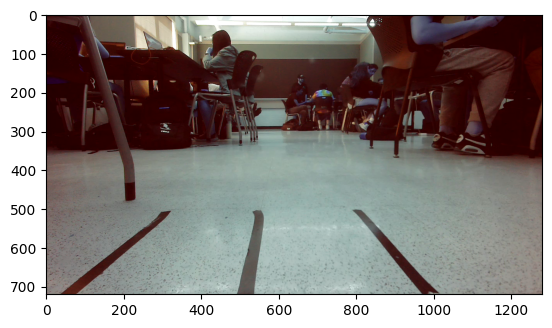

In [31]:

plt.imshow(img)

(360, 1280, 3)


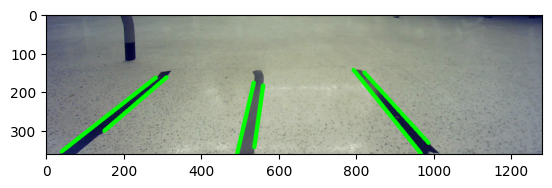

In [3]:

img = cv2.imread('AUV_Stream_Photo.png')
img = img[int(img.shape[0]/2):int(img.shape[0])]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
lines = lane_detection.detect_lines(img, 35, 60, 5, 80, 20)
# lines = lane_detection.rmvExcessLines(lines)
img = lane_detection.draw_lines(img, lines, (0, 255, 0))

plt.imshow(img)
print(np.shape(img))
plt.show()


In [ ]:

lanes = lane_detection.detect_lanes(lines)
img = lane_detection.draw_lanes(img, lanes)
plt.imshow(img)
plt.show()